total spot cnt 51
(51, 1)


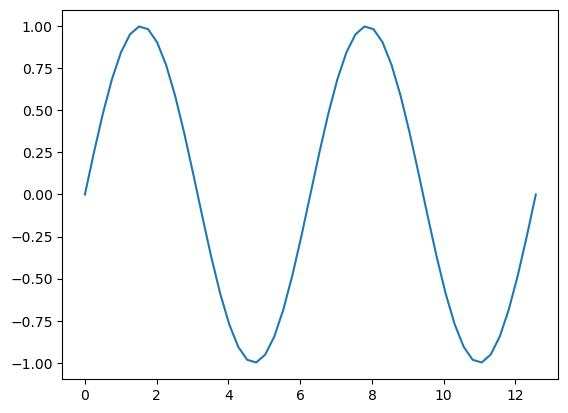

51


In [1]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
pi = 3.141592653589
sin_x = []
sin_y = []

period = 2 #int(input("sin함수의 주기:"))
spot = 25 #int(input("한 주기 당 점의 개수:"))
total_spot = period*spot+1
print("total spot cnt",total_spot)
for i in range(total_spot):#0부터 사인파 period만큼, 한 period 당 점의 갯수 spot
    now_x = i*2*pi/spot
    sin_x.append([now_x])
    sin_y.append([math.sin(now_x)])
#print(sin_x)
print(np.array(sin_x).shape)
plt.plot(sin_x,sin_y)
plt.show()

X = sin_x
print(len(X))
T = sin_y

In [2]:
#LSTM 입력크기
n_in = 1
#Dense의 parameter 초기화
#n_out = int(input("Desne의 output의 크기:"))
n_out = 1
print('Dense_out',n_out)

n_mid = 20
#n_mid = int(input("LSTM output_size:"))
print('LSTM_out',n_mid)

Dense_out 1
LSTM_out 20


In [3]:
n_time =10 #int(input("한번에 고려할 시점 수:")) #한번에 고려할 시점의 개수
batch_size = 8 #int(input("배치 사이즈:"))
epochs = 101
eta = 0.01
interval = 10  # # 경과 표시 간격

input_data=[]
correct_data=[]
n_sample = len(X)-n_time
for i in range(n_sample): # [0 1 2 3 4]를 2시점 씩 고려하면 [0 1] [1 2] [2 3] [3 4] 총 4가지가 되므로 
    smallX=[]
    for j in range(n_time):
        smallX.append(X[i+j])
    input_data.append(smallX)
    correct_data.append(X[i+n_time])
'''
print("X:",np.array(input_data).shape)
print(np.array(input_data[1]))
print("Y:",np.array(correct_data).shape)
print(np.array(correct_data[0]))
'''

'\nprint("X:",np.array(input_data).shape)\nprint(np.array(input_data[1]))\nprint("Y:",np.array(correct_data).shape)\nprint(np.array(correct_data[0]))\n'

In [4]:
def element_sum(arr1, arr2):
    if len(arr1) != len(arr2)  or len(arr1[0]) != len(arr2[0]):
        raise ValueError("Input arrays must have the same shape")
    #print(np.array(arr1))
    #print(np.array(arr2))
    result = []
    for i in range(len(arr1)):
        row = []
        for j in range(len(arr1[0])):
            row.append(arr1[i][j] + arr2[i][j])
        result.append(row)
    
    return result

In [5]:
def element_multi(arr1, arr2):
    if len(arr1) != len(arr2) or len(arr1[0]) != len(arr2[0]):
        raise ValueError("Input arrays must have the same shape")
    #print(np.array(arr1))
    #print(np.array(arr2))
    result = []
    for i in range(len(arr1)):
        row = []
        for j in range(len(arr1[0])):
            row.append(arr1[i][j] * arr2[i][j])
        result.append(row)
    return result

In [6]:
def matrix_product(A, B):
    if type(A[0]) != list:
        A = [A]

    if len(A[0]) != len(B):
        raise ValueError("행렬 곱 연산이 불가능합니다.")

    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            dot_product = 0
            for k in range(len(A[0])):
                dot_product += A[i][k] * B[k][j]
            result[i][j] = dot_product
    return result

In [174]:
class LSTMLayer:
    def __init__(self,n_upper,n):
        #가중치 초기화: 가우시안 초기화 방법,  He 초기화 (He Initialization) 또는 Xavier 초기화 (Glorot Initialization)도 존재
        self.w = []
        self.v = []
        self.b = []
        for _ in range(4): ## 망각 게이트,입력 게이트,새로운 기억, 출력 게이트 총 4개에서 업데이트 해야함
            w0=[[random.gauss(0,1) for i in range(n)] for j in range(n_upper)] # X는 (시점 수, 특징 수)이므로 w 는 (특징수, output_size) 
            #print(np.array(w0).shape)
            v0=[[random.gauss(0,1) for i in range(n)]for j in range(n)]  # Y는 (시점 수, 특징 수)이므로 w 는 (특징수, output_size)
            #print(np.array(v0).shape)
            b0=[0 for i in range(n)] 
            #print(np.array(b0).shape)
            self.w.append(w0)
            self.v.append(v0)
            self.b.append(b0)
        """
        print("Lw",np.array(self.w).shape)
        print("Lv",np.array(self.v).shape)
        print("Lb",np.array(self.b).shape)
        """
    def forward(self, x, y_prev, c_prev):
        reshape_b = []
        for i in range(4):
            reshape_b.append([self.b[i] for _ in range(8)])
        #print("reshape_b",np.array(reshape_b).shape)
        #print("self.b",np.array(self.b))
        u = []
        for i in range(4):
            Xw = matrix_product(x, self.w[i])
            Yv = matrix_product(y_prev, self.v[i])
            Xw_Yv = element_sum(Xw,Yv)
            u.append(element_sum(element_sum(Xw,Yv),reshape_b[i]))
        #print("u",np.array(u).shape)
        #print("Xw",np.array(Xw).shape)
        #print(x)
        #print("self.b",np.array(self.b).shape)
        #print("self.b",np.array(self.b))
        #print(self.w)
        a0 = activation('Sigmoid',u[0])  # 망각 게이트
        a1 = activation('Sigmoid',u[1])  # 입력 게이트
        a2 = activation('Tanh',u[2])  # 새로운 기억
        a3 = activation('Sigmoid',u[3])  # 출력 게이트

        self.gates = []
        self.gates.append(a0)
        self.gates.append(a1)
        self.gates.append(a2)
        self.gates.append(a3)
        #print("gates",np.array(self.gates).shape)
        self.c = element_sum(element_multi(a0,c_prev),element_multi(a1,a2))
        tanh_c = activation('Tanh',self.c)
        self.y = element_multi(a3,tanh_c)
        #print("self.c",np.array(self.c).shape)
        #print("self.y",np.array(self.y).shape)

    def reset_sum_grad(self):
        #print("self.w",np.array(self.w).shape)
        #print("self.v",np.array(self.v).shape)
        #print("self.b",np.array(self.b).shape)

        self.grad_w = zeros_like_3d(self.w)
        self.grad_v = zeros_like_3d(self.v)
        self.grad_b = zeros_like_2d(self.b)

        #print("self.grad_w",np.array(self.grad_w).shape)
        #print("self.grad_v",np.array(self.grad_v).shape)
        #print("self.grad_b",np.array(self.grad_b).shape)

    def backward(self, x, y, c, y_prev, c_prev, gates, grad_y, grad_c):
        


IndentationError: expected an indented block (3124960264.py, line 68)

In [145]:
def custom_slice_3d(array, column_index):
    result = []
    for row in array:
        result.append(row[column_index])
    return result

In [146]:
def elememt_diff(arr1,arr2):
    if len(arr1) != len(arr2) or len(arr1[0]) != len(arr2[0]):
        raise ValueError("Input arrays must have the same shape")
    #print(np.array(arr1))
    #print(np.array(arr2))
    result = []
    for i in range(len(arr1)):
        row = []
        for j in range(len(arr1[0])):
            row.append(arr1[i][j] - arr2[i][j])
        result.append(row)
    return result

In [147]:
def transpose_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    # 전치 행렬을 저장할 빈 리스트 생성
    transposed = [[0 for _ in range(rows)] for _ in range(cols)]
    
    # 행과 열 바꾸기
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    
    return transposed

In [148]:
def Sum_1D(arr):
    sum = 0
    for i in arr:
        sum += i[0]
    return [sum]

In [149]:
class OutputLayer:
    def __init__(self,n_upper,n):
        #가중치 초기화: 가우시안 초기화 방법,  He 초기화 (He Initialization) 또는 Xavier 초기화 (Glorot Initialization)도 존재
        self.w = [[random.gauss(0,1) for i in range(n)] for j in range(n_upper)]
        self.b = [random.gauss(0,1) for i in range(n)]
        print("Dw",np.array(self.w).shape)
        print("Db",np.array(self.b).shape)

    def forward(self,x):
        """
        print("x",np.array(x).shape)
        print("w",np.array(self.w).shape)
        print("Xw",np.array(matrix_product(x, self.w)).shape)
        print("b",np.array(self.b).shape)
        print("b",np.array(self.b))
        print("reshape_b",np.array(reshape_b).shape)
        print("reshape_b",np.array(reshape_b))
        """
        self.x = x
        reshape_b = [self.b for i in range(8)]
        u = element_sum(matrix_product(x, self.w), reshape_b)
        self.y = activation('Equl',u)

    def backward(self, t):
        delta = elememt_diff(self.y,t)
        #print("delta",np.array(delta).shape)
        #print(np.array(delta))
        self.grad_w = matrix_product(transpose_matrix(self.x),delta)
        self.grad_b = Sum_1D(delta)
        self.grad_x = matrix_product(delta,transpose_matrix(self.w))

In [150]:
lstm_layer = LSTMLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

Dw (20, 1)
Db (1,)


In [151]:
def custom_slice_4d(array, dimension_index):
    result = []
    for index_0 in array:
        #print("index_0",np.array(index_0))
        arr_1 = []
        for index_1 in index_0:
            arr_1.append(index_1[dimension_index])
        result.append(arr_1)
    return result

In [152]:
origin_4d = [
    [
        [
            [1, 0, 0, 0, 0],
            [2, 0, 0, 0, 0],
            [3, 0, 0, 0, 0],
            [4, 0, 0, 0, 0]
        ],
        [
            [5, 0, 0, 0, 0],
            [6, 0, 0, 0, 0],
            [7, 0, 0, 0, 0],
            [8, 0, 0, 0, 0]
        ],
        [
            [9, 0, 0, 0, 0],
            [10, 0, 0, 0, 0],
            [11, 0, 0, 0, 0],
            [12, 0, 0, 0, 0]
        ]
    ],
    [
         [
            [13, 0, 0, 0, 0],
            [14, 0, 0, 0, 0],
            [15, 0, 0, 0, 0],
            [16, 0, 0, 0, 0]
        ],
        [
            [17, 0, 0, 0, 0],
            [18, 0, 0, 0, 0],
            [19, 0, 0, 0, 0],
            [20, 0, 0, 0, 0]
        ],
        [
            [21, 0, 0, 0, 0],
            [22, 0, 0, 0, 0],
            [23, 0, 0, 0, 0],
            [24, 0, 0, 0, 0]
        ]
    ]
]

In [153]:
insert_3d = [
    [
        [ 11, 12, 13, 14, 15],
        [ 21, 22, 23, 24, 25],
        [ 31, 32, 33, 34, 35],
    ],
    [
        [ 41, 42, 43, 44, 45],
        [ 51, 52, 53, 54, 55],
        [ 61, 62, 63, 64, 65],
    ],
 ]

In [154]:
insert_slice_4d(insert_3d,origin_4d,0)

[[[[11, 12, 13, 14, 15], [2, 0, 0, 0, 0], [3, 0, 0, 0, 0], [4, 0, 0, 0, 0]],
  [[21, 22, 23, 24, 25], [6, 0, 0, 0, 0], [7, 0, 0, 0, 0], [8, 0, 0, 0, 0]],
  [[31, 32, 33, 34, 35],
   [10, 0, 0, 0, 0],
   [11, 0, 0, 0, 0],
   [12, 0, 0, 0, 0]]],
 [[[41, 42, 43, 44, 45], [14, 0, 0, 0, 0], [15, 0, 0, 0, 0], [16, 0, 0, 0, 0]],
  [[51, 52, 53, 54, 55], [18, 0, 0, 0, 0], [19, 0, 0, 0, 0], [20, 0, 0, 0, 0]],
  [[61, 62, 63, 64, 65],
   [22, 0, 0, 0, 0],
   [23, 0, 0, 0, 0],
   [24, 0, 0, 0, 0]]]]

In [155]:
def insert_slice_4d(insert,orign,column_index):
    #print("before",np.array(orign))
    cnt_0 = 0
    for index_0 in orign:
        #print("index_0",np.array(index_0))
        cnt_1 = 0
        for index_1 in index_0:
            index_1[column_index] = insert[cnt_0][cnt_1]
            cnt_1 += 1
        cnt_0 += 1
    print("after",np.array(orign))
    return orign

In [156]:
print(origin_4d)

[[[[11, 12, 13, 14, 15], [2, 0, 0, 0, 0], [3, 0, 0, 0, 0], [4, 0, 0, 0, 0]], [[21, 22, 23, 24, 25], [6, 0, 0, 0, 0], [7, 0, 0, 0, 0], [8, 0, 0, 0, 0]], [[31, 32, 33, 34, 35], [10, 0, 0, 0, 0], [11, 0, 0, 0, 0], [12, 0, 0, 0, 0]]], [[[41, 42, 43, 44, 45], [14, 0, 0, 0, 0], [15, 0, 0, 0, 0], [16, 0, 0, 0, 0]], [[51, 52, 53, 54, 55], [18, 0, 0, 0, 0], [19, 0, 0, 0, 0], [20, 0, 0, 0, 0]], [[61, 62, 63, 64, 65], [22, 0, 0, 0, 0], [23, 0, 0, 0, 0], [24, 0, 0, 0, 0]]]]


In [157]:
#0번째 일때 Y와C의 이전을 구하기 힘드므로 인덱스 1이 시작
lstmX = []
lstmX.append([[0] for i in range(BatchSize)for i in range(input_feature)])
for time in range(n_time): #각 time 당 원소들 다시 묶음
    newX = custom_slice_3d(mb_x, time)
    lstmX.append(newX)
print(np.array(lstmX).shape)
#print(np.array(lstmX))
lstmY = []
lstmC = []
for time in range(n_time+1): #각 time 당 원소들 다시 묶음
    newY = 
    lstmY.append(newY)
    newC = custom_slice_3d(c_rnn, time)
    lstmC.append(newC)
print(np.array(lstmY).shape)
#print(np.array(lstmY))
print(np.array(lstmC).shape)
#print(np.array(lstmC))

SyntaxError: invalid syntax (2720585739.py, line 12)

In [158]:
def activation(function,x):
    e = 2.718281828459045 #자연상수:2.71828182845904523536
    result = []
    if(function == 'Sigmoid'):
        for i in range(len(x)):
            row = []
            for j in range(len(x[0])):
                now_x = x[i][j]
                row.append((e**now_x)/((e**now_x)+1)) #C언어에서는 **이 없어 **도 구현
            result.append(row)
        return result
    if(function == 'Tanh'):
        for i in range(len(x)):
            row = []
            for j in range(len(x[0])):
                now_x = x[i][j]
                row.append((2/(1+(e**(-2*now_x))))-1)
            result.append(row)
        return result
    if(function == 'ReLU'):
        for i in range(len(x)):
            row = []
            for j in range(len(x[0])):
                now_x = x[i][j]
                if (now_x<=0):
                    row.append(0)
                else:
                    row.append(now_x)
            result.append(row)
        return result
    if(function == 'Equl'):
        return x

In [159]:
def insert_slice_3d(insert,orign,column_index):
    #print(np.array(orign))
    cnt = 0
    for row in orign:
        #print(np.array(row[column_index]))
        #print(np.array(insert[cnt]))
        row[column_index] = insert[cnt]
        cnt += 1
    #print(np.array(orign))
    return orign

In [160]:
def insert_slice_4d(insert,orign,column_index):
    #print("before",np.array(orign))
    cnt_0 = 0
    for index_0 in orign:
        #print("index_0",np.array(index_0))
        cnt_1 = 0
        for index_1 in index_0:
            index_1[column_index] = insert[cnt_0][cnt_1]
            cnt_1 += 1
        cnt_0 += 1
    #print("after",np.array(orign))
    return orign

In [169]:
def train(x_mb, t_mb):
    y_rnn = [[[0 for i in range(n_mid)] for j in range(n_time+1)] for _ in range(len(x_mb))] # 실제 값은 X의 입력 만큼 있어야 하므로
    c_rnn = [[[0 for i in range(n_mid)] for j in range(n_time+1)] for _ in range(len(x_mb))] # X은 시점 수 만큼 있어야 하므로
    gates_rnn = [[[[0 for i in range(n_mid)] for j in range(n_time)] for _ in range(len(x_mb))] for k in range(4)]
    """
    print("y_rnn:",np.array(y_rnn).shape)
    print(y_rnn)
    print("c_rnn:",np.array(c_rnn).shape)
    print(c_rnn)
    print("gates_rnn:",np.array(gates_rnn).shape)
    print(gates_rnn)
    """
    y_prev = custom_slice_3d(y_rnn, 0)
    c_prev = custom_slice_3d(c_rnn, 0)
    """
    print("y_prev:",np.array(y_prev).shape)
    print("c_prev:",np.array(c_prev).shape)
    """
    for i in range(n_time):
        x = custom_slice_3d(x_mb, i)
        #print(np.array(x).shape)
        #print("STArt lstm forward")
        lstm_layer.forward(x, y_prev, c_prev)
        
        y = lstm_layer.y
        #print("before",np.array(y_rnn))
        insert_slice_3d(y,y_rnn,i+1)
        #print("after",np.array(y_rnn))
        y_prev = y
        c = lstm_layer.c
        c_rnn = insert_slice_3d(c,c_rnn,i+1)
        c_prev = c
        gates = lstm_layer.gates
        gates_rnn = insert_slice_4d(gates,gates_rnn,i)
        output_layer.forward(y)

        output_layer.backward(t_mb)
        grad_y = output_layer.grad_x
        grad_c = zeros_like_2d(lstm_layer.c)
        #print("grad_c",np.array(grad_c).shape)
        #print("grad_c",np.array(grad_c))
        
        lstm_layer.reset_sum_grad()
        
        for i in reversed(range(n_time)):
            x = custom_slice_3d(x_mb, i)
            y = custom_slice_3d(y_rnn, i+1)
            c = custom_slice_3d(c_rnn, i+1)
            y_prev = custom_slice_3d(y_rnn, i)
            c_prev = custom_slice_3d(c_rnn, i)
            gates = custom_slice_4d(gates_rnn, i)
            ##################여기부터 시작################
            lstm_layer.backward(x, y, c, y_prev, c_prev, gates, grad_y, grad_c)
            
        

In [170]:
grad_c=[]#grad_c = np.zeros_like(lstm_layer.c)
        for index in lstm_layer.c:
            cnt_c = []
            for j in index:
                    cnt_c.append(0)
            grad_c.append(cnt_c)

IndentationError: unexpected indent (355626690.py, line 2)

In [171]:
def zeros_like_2d(array):
    result=[]
    for index in array:
        cnt = []
        for j in index:
                cnt.append(0)
        result.append(cnt)
    return result

In [172]:
def zeros_like_3d(array):
    result=[]
    for index_1 in array:
        cnt_1 = []
        for index_2 in index_1:
            cnt_2 = []
            for index_3 in index_2:
                cnt_2.append(0)
            cnt_1.append(cnt_2)        
        result.append(cnt_1)
    return result

In [173]:
error_record = []
n_batch = len(input_data) // batch_size  #  # 1에포크당 배치 개수
for i in range(epochs):
    index_random = []
    for index in range(len(input_data)):
        index_random.append(index)
    random.shuffle(index_random)
    #print(np.array(index_random).shape)
    #print(index_random)
    for j in range(n_batch):
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        """
        print("mb_index",np.array(mb_index).shape)
        print(mb_index)
        """
        x_mb = []
        t_mb = []
        for index in mb_index:
            x_mb.append(input_data[index])
            t_mb.append(correct_data[index])
        """
        print("x_mb",np.array(x_mb).shape)
        print(x_mb)
        print("t_mb",np.array(t_mb).shape)
        print(t_mb)
        """
        train(x_mb, t_mb)
        break
    break
""""""""""""""""""""""""""""""""""""""""""""""""""""""""
print(n_batch)
mb_x = X[:BatchSize]
print("mb_x:",np.array(mb_x).shape)
print(np.array(mb_x))

self.w (4, 1, 20)
self.v (4, 20, 20)
self.b (4, 20)
self.grad_w (4, 1, 20)
self.grad_v (4, 20, 20)
self.grad_b (4, 20)
self.w (4, 1, 20)
self.v (4, 20, 20)
self.b (4, 20)
self.grad_w (4, 1, 20)
self.grad_v (4, 20, 20)
self.grad_b (4, 20)
self.w (4, 1, 20)
self.v (4, 20, 20)
self.b (4, 20)
self.grad_w (4, 1, 20)
self.grad_v (4, 20, 20)
self.grad_b (4, 20)
self.w (4, 1, 20)
self.v (4, 20, 20)
self.b (4, 20)
self.grad_w (4, 1, 20)
self.grad_v (4, 20, 20)
self.grad_b (4, 20)
self.w (4, 1, 20)
self.v (4, 20, 20)
self.b (4, 20)
self.grad_w (4, 1, 20)
self.grad_v (4, 20, 20)
self.grad_b (4, 20)
self.w (4, 1, 20)
self.v (4, 20, 20)
self.b (4, 20)
self.grad_w (4, 1, 20)
self.grad_v (4, 20, 20)
self.grad_b (4, 20)
self.w (4, 1, 20)
self.v (4, 20, 20)
self.b (4, 20)
self.grad_w (4, 1, 20)
self.grad_v (4, 20, 20)
self.grad_b (4, 20)
self.w (4, 1, 20)
self.v (4, 20, 20)
self.b (4, 20)
self.grad_w (4, 1, 20)
self.grad_v (4, 20, 20)
self.grad_b (4, 20)
self.w (4, 1, 20)
self.v (4, 20, 20)
self.b (4, 

NameError: name 'BatchSize' is not defined

In [70]:
mb_t = [T[i+BatchSize] for i in range(BatchSize)] # 타겟이 다음 점의 x가 되도록
print("mb_t:",np.array(mb_t).shape)
print(mb_t)

NameError: name 'BatchSize' is not defined

In [ ]:
cnt = 0
for i in mb_x[0][0]:
    cnt += 1
input_feature = cnt
print(input_feature)

In [ ]:
print(np.array(w_matrix).shape)
print(np.array(v_matrix).shape)
print(np.array(b_matrix).shape)

In [ ]:
def LSTMforward(nowtime,X,w_matrix,Y,v_matrix,b_matrix,C):
    ###################################LSTM###################################
    pasttime = nowtime - 1
    #forgot gate
    #print("===========forgot gate============")
    Xw = matrix_product(X[nowtime],w_matrix[0])
    Yv = matrix_product(Y[pasttime],v_matrix[0])
    """
    print(np.array(Xw).shape)
    print(np.array(Xw))
    print(np.array(Yv).shape)
    print(np.array(Yv))
    """
    Xw_Yv_b = element_sum(element_sum(Xw,Yv),b_matrix[0])
    fGate = activation('Sigmoid',Xw_Yv_b)
    #print(np.array(fGate).shape)
    #print(np.array(fGate))

    #input gate
    #print("===========input gate============")
    Xw = matrix_product(X[nowtime],w_matrix[1])
    Yv = matrix_product(Y[pasttime],v_matrix[1])
    Xw_Yv_b = element_sum(element_sum(Xw,Yv),b_matrix[1])
    iGate = activation('Sigmoid',Xw_Yv_b)
    #print(np.array(iGate).shape)
    #print(np.array(iGate))

    #new input
    #print("===========new input============")
    Xw = matrix_product(X[nowtime],w_matrix[2])
    Yv = matrix_product(Y[pasttime],v_matrix[2])
    Xw_Yv_b = element_sum(element_sum(Xw,Yv),b_matrix[2])
    newIn = activation('Tanh',Xw_Yv_b)
    #print(np.array(newIn).shape)
    #print(np.array(newIn))

    #output gate
    #print("===========output gate============")
    Xw = matrix_product(X[nowtime],w_matrix[3])
    Yv = matrix_product(Y[pasttime],v_matrix[3])
    Xw_Yv_b = element_sum(element_sum(Xw,Yv),b_matrix[3])
    oGate = activation('Sigmoid',Xw_Yv_b)
    #print(np.array(oGate).shape)
    #print(np.array(oGate))

    #State
    C[nowtime] = element_sum(element_multi(C[pasttime], fGate),element_multi(iGate, newIn))
    Y[nowtime] = element_multi(oGate,activation('Tanh',C[nowtime]))

    #print(nowtime)
    #print(np.array(Y[nowtime]))
    return fGate,iGate,newIn,oGate

In [ ]:
print(np.array(lstmX).shape)
print(np.array(w_matrix).shape)
print(np.array(lstmY).shape)
print(np.array(v_matrix).shape)
print(np.array(b_matrix).shape)

In [ ]:
for time in range(1,n_time+1,1):
    a0, a1, a2, a3 = LSTMforward(time,lstmX,w_matrix,lstmY,v_matrix,b_matrix,lstmC)

In [ ]:
print(np.array(lstmY).shape)
print(np.array(lstmY))

In [ ]:
#순전파 Dense
Dense_X = lstmY[n_time] #LSTM수행 후 마지막 Y값을 Dense의 입력값(X)으로
print(np.array(Dense_X).shape)

In [ ]:
Dense_X_feature = 0
Dense_X_len = 0
for i in DenseX:
    Dense_X_len +=1
for i in Dense_X[0]:
    Dense_X_feature += 1

In [ ]:
Dense_Y = element_sum(matrix_product(Dense_X,Dense_w),Dense_b)

In [ ]:
print(np.array(Dense_Y).shape)
print(np.array(Dense_Y))

In [ ]:
#Denseforward의 활성화 함수
Dense_Y = activation("Equl",Dense_Y)

In [ ]:
print(np.array(Dense_Y).shape)
print(np.array(Dense_Y))

In [ ]:
Dense_T = mb_t
print(np.array(Dense_T).shape)
print(np.array(Dense_T))

In [ ]:
### Dense 역전파
Dense_delta =elememt_diff(Dense_Y ,Dense_T)
print(np.array(Dense_delta))

In [ ]:
print(np.array(Dense_X).shape)
Dense_X_T = transpose_matrix(Dense_X)
print(np.array(Dense_X_T).shape)

In [ ]:
print(np.array(Dense_w).shape)

In [ ]:
Dense_X_T = transpose_matrix(Dense_X)
D_grad_w = matrix_product(Dense_X_T,Dense_delta)
print((np.array(D_grad_w)).shape)
D_grad_b = Sum_1D(Dense_delta)
print((np.array(D_grad_b)).shape)
Dense_w_T = transpose_matrix(Dense_w)
D_grad_x = matrix_product(Dense_delta,Dense_w_T)
print((np.array(D_grad_x)).shape)

In [ ]:
L_grad_y = D_grad_x
L_grad_c = [] # lstmC와 같은 크기의 0으로 채워진 배열
for time in range(n_time+1): #각 time 당 원소들 다시 묶음
    newC = custom_slice(c_rnn, time)
    L_grad_c.append(newC)
print(np.array(lstmC).shape)
print(np.array(L_grad_c).shape)

In [ ]:
# LSTM역전파를 위한 parameter의 기울기(미분값) 초기화 #reset_sum_grad
L_grad_w = []
L_grad_v = []
L_grad_b = []

for _ in range(4): ## 망각 게이트,입력 게이트,새로운 기억, 출력 게이트 총 4개에서 업데이트 해야함
    w0=[[random.gauss(0,1) for i in range(LSTM_out)] for j in range(input_feature)] # X는 (시점 수, 특징 수)이므로 w 는 (특징수, output_size) 
    #print(np.array(w0).shape)
    v0=[[random.gauss(0,1) for i in range(LSTM_out)]for j in range(LSTM_out)]  # Y는 (시점 수, 특징 수)이므로 w 는 (특징수, output_size)
    #print(np.array(v0).shape)
    b0=[[random.gauss(0,1) for i in range(LSTM_out)]for j in range(BatchSize)] 
    #print(np.array(b0).shape)
    L_grad_w.append(w0)
    L_grad_v.append(v0)
    L_grad_b.append(b0)


In [ ]:
print(np.array(L_grad_w).shape)
print(np.array(L_grad_v).shape)
print(np.array(L_grad_b).shape)

In [ ]:
print(np.array(lstmC).shape)

In [ ]:
#############역전파 LSTM###########
for time in range(n_time-1,-1,-1):
    LSTMbackward(time,lstmX,w_matrix,lstmY,v_matrix,b_matrix,lstmC,L_grad_y,L_grad_c,a0,a1,a2,a3,L_grad_w,L_grad_v,L_grad_b)
    break

In [ ]:
print(np.array(L_grad_w).shape)

In [ ]:
def LSTMbackward(nowtime,X,w_matrix,Y,v_matrix,b_matrix,C,grad_y, grad_c,a0,a1,a2,a3,grad_w,grad_v,grad_b):
    pasttime = nowtime + 1
    tanh_c = activation('Tanh',C[nowtime])
    martrix_1=[]
    for i in tanh_c:
        new_c=[]
        for j in tanh_c[0]:
            new_c.append(1)
        martrix_1.append(new_c) 
    r =element_sum(grad_c[nowtime],element_multi(element_multi(grad_y,a3),elememt_diff(martrix_1,element_multi(tanh_c,tanh_c))))
    print("r",np.array(r).shape)
    delta_a0 = element_multi(element_multi(element_multi(r ,C[pasttime]), a0) ,elememt_diff(martrix_1,a0))
    print("delta_a0",np.array(delta_a0).shape)
    delta_a1 = element_multi(element_multi(element_multi(r ,a2), a1) ,elememt_diff(martrix_1,a1))
    print("delta_a1",np.array(delta_a1).shape)
    delta_a2 = element_multi(element_multi(r ,a1) ,elememt_diff(martrix_1,element_multi(a2,a2)))
    print("delta_a2",np.array(delta_a2).shape)
    delta_a3 = element_multi(element_multi(element_multi(grad_y,tanh_c),a3),elememt_diff(martrix_1,a3))
    print("delta_a3",np.array(delta_a3).shape)
    deltas = []
    deltas.append(delta_a0)
    deltas.append(delta_a1)
    deltas.append(delta_a2)
    deltas.append(delta_a3)
    print("deltas",np.array(deltas).shape)
    print(np.array(transpose_matrix(X[nowtime])).shape)
    for i in range(4):
        grad_w[i] = matrix_product(transpose_matrix(X[nowtime]),deltas[i])
    print("grad_w",np.array(grad_w).shape)
    for i in range(4):
        grad_v[i] = matrix_product(transpose_matrix(Y[pasttime]),deltas[i])
    print("grad_v",np.array(grad_v).shape)
    for i in range(4):
        grad_v[i] = matrix_product(transpose_matrix(Y[pasttime]),deltas[i])
    print("grad_v",np.array(grad_v).shape)